* Dataset-coronavirus
* Domain=Healthcare
* Date=03/13/2020
* Problem statement :EDA to find useful insights from data
* Approach: visualize data with the help of Matplotlib,Seaborn and analyze and clean data using pandas.
* All the insights are based on the Coronavirus data add your valuable suggestions and correct me if am wrong anywhere.

In [6]:
#Importing useful liabraries
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

/kaggle/input/route.csv
/kaggle/input/patient.csv
/kaggle/input/time.csv


* *#Load data and do some basic understanding of data*

In [7]:
patient=pd.read_csv("/kaggle/input/patient.csv")
route=pd.read_csv("/kaggle/input/route.csv")
time=pd.read_csv("/kaggle/input/time.csv")

pd.set_option('display.max_columns', None)

* *#Basic understanding of patient data*

In [9]:
print(patient.columns)
print(patient.shape)
print(patient.info)
print(patient.dtypes)



Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state'],
      dtype='object')
(5328, 14)
<bound method DataFrame.info of         id     sex  birth_year country               region group  \
0        1  female      1984.0   China  filtered at airport   NaN   
1        2    male      1964.0   Korea  filtered at airport   NaN   
2        3    male      1966.0   Korea         capital area   NaN   
3        4    male      1964.0   Korea         capital area   NaN   
4        5    male      1987.0   Korea         capital area   NaN   
...    ...     ...         ...     ...                  ...   ...   
5323  5324     NaN         NaN   Korea                  NaN   NaN   
5324  5325     NaN         NaN   Korea                  NaN   NaN   
5325  5326     NaN         NaN   Korea                  NaN   NaN   
5326  5327     NaN         NaN   

Insight:

We cannot merge data because all the dataframe have different shape and if
we try to merge forcefully it will take only common key data and
we lost 90% of our data 

* *Looking for null values*

In [11]:
print("Patient dataframe :")
print(patient.apply(lambda x:x.isnull().mean().round(4)*100))


Patient dataframe :
id                   0.00
sex                 92.81
birth_year          93.06
country              0.00
region              93.04
group               98.48
infection_reason    97.37
infection_order     99.34
infected_by         98.69
contact_number      99.12
confirmed_date       0.00
released_date       99.40
deceased_date       99.62
state                0.00
dtype: float64


Insight:

As we see most of the feature of our data in Patient dateframe is 90-100% null so if we remove them then we lost ost of our data 
so we leave the null rows as it is.

* *Changing Date columns into datetype.*

In [15]:

patient[["released_date","confirmed_date","deceased_date"]]=patient[["released_date","confirmed_date","deceased_date"]].apply(pd.to_datetime)


* *Calculating age on the basis of birth year.*

In [12]:
patient["Age"]=patient["birth_year"].apply(lambda x:2020-x)


* *Creating age range*

In [13]:
import math
def group_age(age):
    if age >= 0: # not NaN
        if age % 10 != 0:
            lower = int(math.floor(age / 10.0)) * 10
            upper = int(math.ceil(age / 10.0)) * 10 - 1
            return f"{lower}-{upper}"
        else:
            lower = int(age)
            upper = int(age + 9) 
            return f"{lower}-{upper}"
    return "Unknown"


patient["age_range"] = patient["Age"].apply(group_age)
patient["age_range"]


0         30-39
1         50-59
2         50-59
3         50-59
4         30-39
         ...   
5323    Unknown
5324    Unknown
5325    Unknown
5326    Unknown
5327    Unknown
Name: age_range, Length: 5328, dtype: object

Insights:
Some age-range shows unknown these are null values.

* *percentage of patient got released deceased or isolated*

In [14]:

released=patient[patient["state"]=="released"].shape[0]
isolated=patient[patient["state"]=="isolated"].shape[0]
deceased=patient[patient["state"]=="deceased"].shape[0]

print("Patient got recovered=",released*100/5328)
print("Patient got isolated=" ,isolated*100/5328)
print("patient dead=",deceased*100/5328)

Patient got recovered= 0.6569069069069069
Patient got isolated= 98.96771771771772
patient dead= 0.37537537537537535


* *In how many days patient got released.*

In [16]:

patient["Release_days"]=patient["released_date"].sub(patient["confirmed_date"])
print("Average number of days in which patient got recovered from virus=",patient["Release_days"].mean())


Average number of days in which patient got recovered from virus= 14 days 16:30:00


* *Average number of days in which patient deceased due to virus.*

In [19]:
patient["Deceased_days"]=patient["deceased_date"].sub(patient["confirmed_date"])
print("Average number of days in which patient dead due to virus=",patient["Deceased_days"].mean())


Average number of days in which patient dead due to virus= 1 days 21:36:00


* *Visualization on patient data*

* *Rate of infection on based on gender*

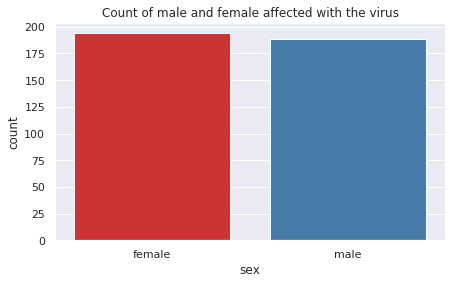

female    194
male      189
Name: sex, dtype: int64

In [20]:

sns.set(rc={"figure.figsize":(7,4)})
sns.countplot(x=patient["sex"],palette="Set1")
plt.title("Count of male and female affected with the virus")
plt.show()
patient["sex"].value_counts()


Insight:
Both male and female are equally prone to virus.

* *Rate of infection by age range*

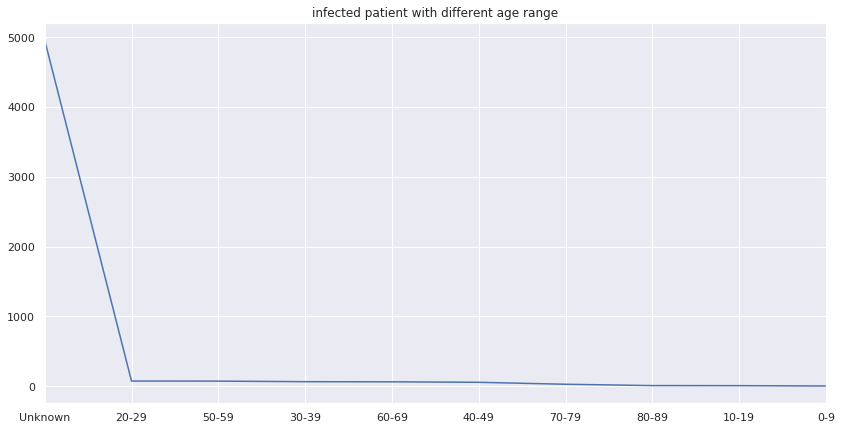

In [63]:
plt.rcParams["figure.figsize"]=14,7
patient.age_range.value_counts().plot.line()
plt.title("infected patient with different age range")
plt.show()


Insight: As we see the afe range between 20-50 is highly prone to diseases because this age group include students,working people,travelers and others.
people of this age group are easily come in cntact with other people.



* *Which country is highly affected with virus*

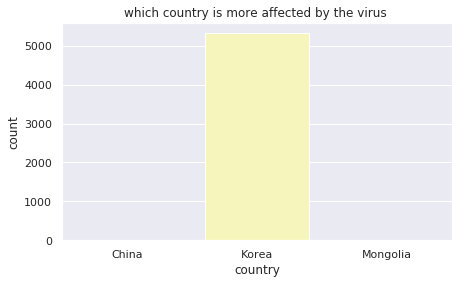

Korea       5319
China          8
Mongolia       1
Name: country, dtype: int64

In [23]:

plt.rcParams["figure.figsize"]=7,4
sns.countplot(x=patient["country"],palette="Set3")
plt.title("which country is more affected by the virus ")
plt.show()
patient["country"].value_counts()

Insight:
According to the data we have and the above graph we can say that korea is highly affected with the virus and Mongolia is least.


* *Rate of infection in different region of the country*

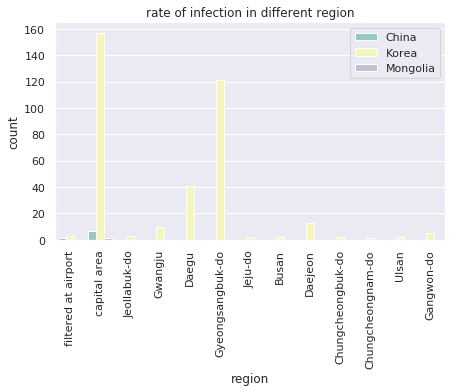

In [68]:
plt.rcParams["figure.figsize"]=7,4
sns.countplot(x=patient["region"],palette="Set3",hue=patient["country"])
plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.title("rate of infection in different region")
plt.show()
#Capital area is most affected area with the virus

Insight:
Capital area of korea and china and mongolia is highly affected.

* *Different reason of infection.*

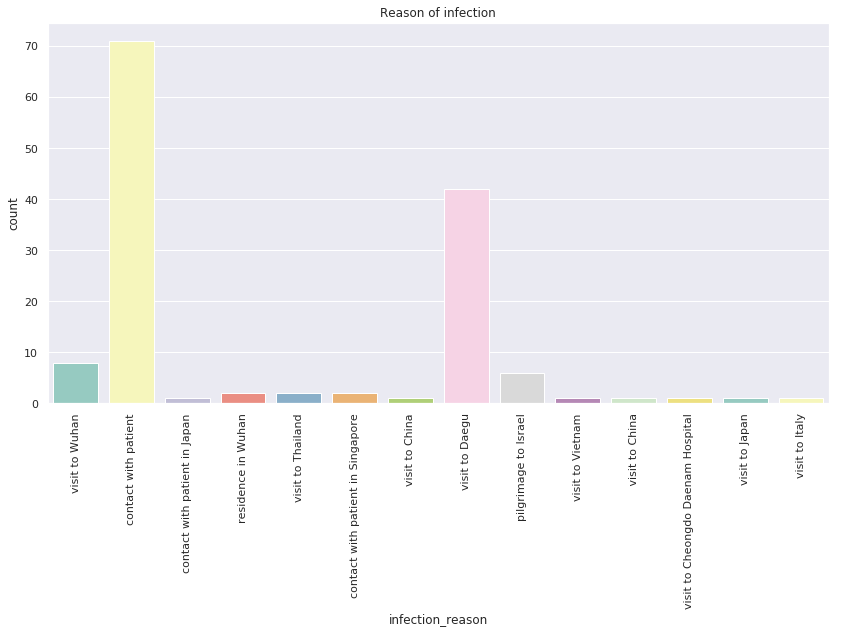

In [25]:
plt.rcParams["figure.figsize"]=14,7
sns.countplot(x=patient["infection_reason"],palette="Set3")
plt.xticks(rotation=90)
plt.title("Reason of infection")
plt.show()

Insights:
People who comes in contact with the virus affected patient.

* *Infection order.*

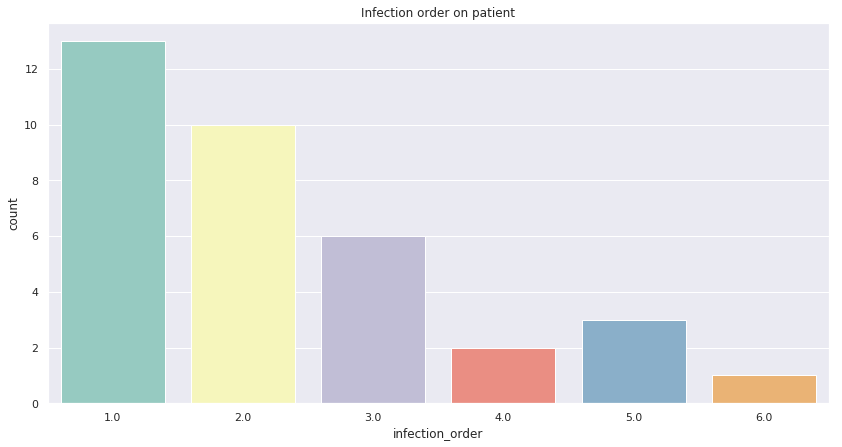

In [26]:
plt.rcParams["figure.figsize"]=14,7
sns.countplot(x=patient["infection_order"],palette="Set3")
plt.title("Infection order on patient")
plt.show()

Insights:
Infection is divided into 6 order on the basis of its impact.
Most people is affected by infection order 1


* *Different groups infected by virus*

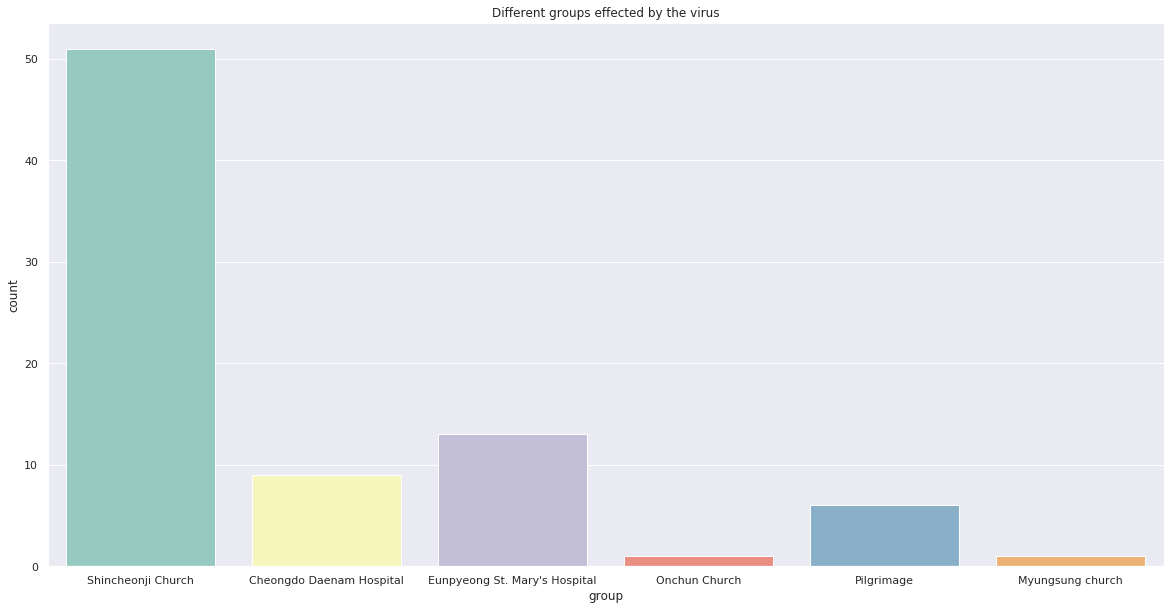

In [30]:

sns.set(rc={"figure.figsize":(20,10)})
sns.countplot(x=patient["group"],palette="Set3")
plt.title("Different groups effected by the virus",)
plt.show()

* *State of patient as whole*

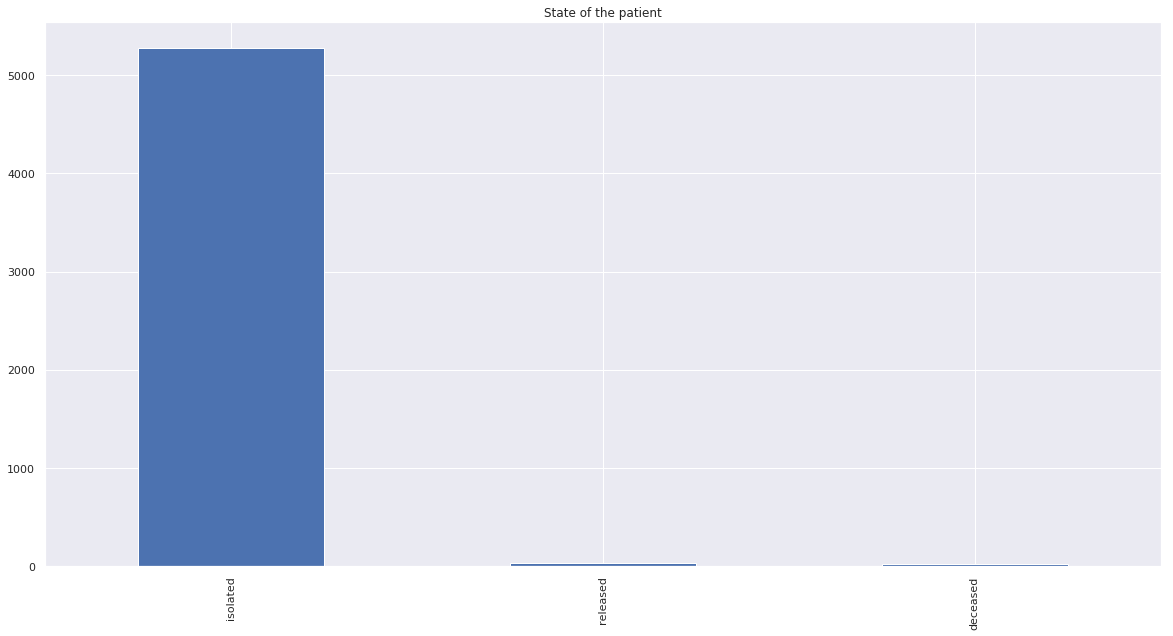

In [31]:
 
patient.state.value_counts().plot.bar()  
plt.title("State of the patient")
plt.show()

* *State of patient on the based on gender*

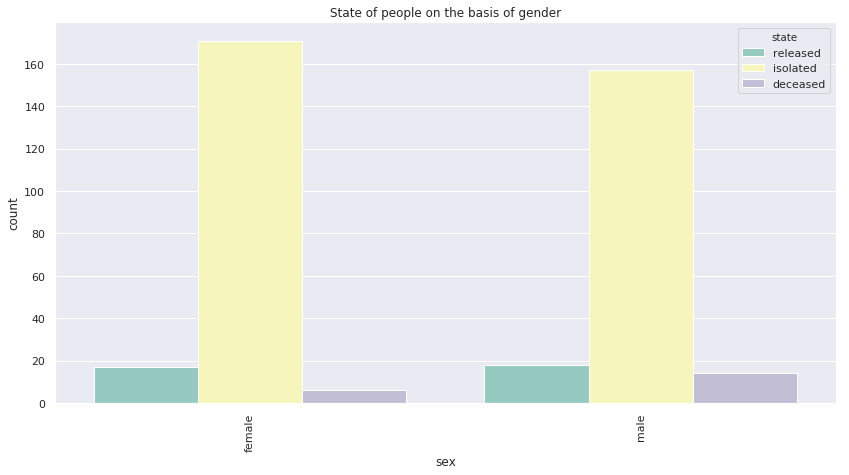

In [44]:

sns.set(rc={"figure.figsize":(14,7)})
sns.countplot(x=patient["sex"],palette="Set3",hue=patient["state"])
plt.xticks(rotation=90)
plt.title("State of people on the basis of gender",)
plt.show()

Insights:
As both male and female are equally affected by the virus but rate of death in male is more than female.

*  *State of people affected by virus in different groups*

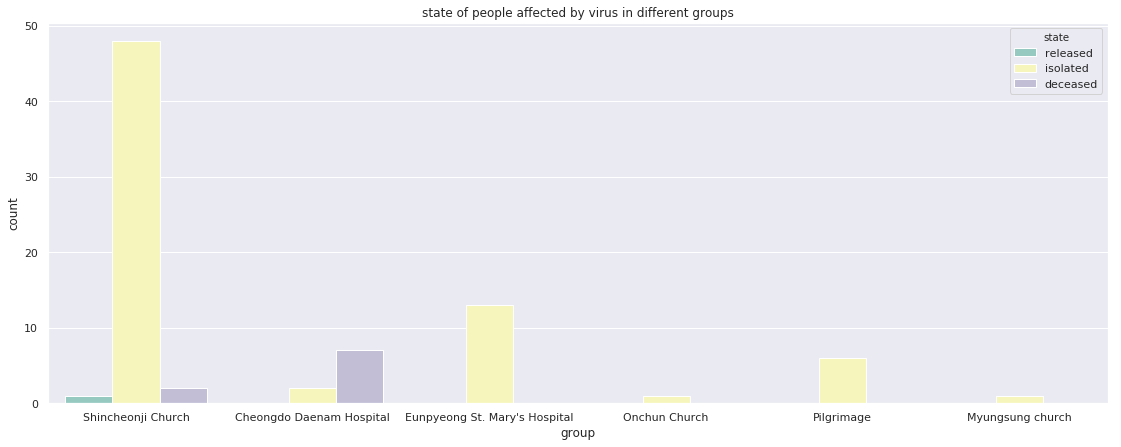

In [43]:
sns.set(rc={"figure.figsize":(19,7)})
sns.countplot(x=patient["group"],palette="Set3",hue=patient["state"])
plt.title("state of people affected by virus in different groups")
plt.show()

Insights:Only people of Shincheonji church is recovered and rate of death in  cheongdo Daenam Hospital is high as compared to all the the othergroups.

* *state of peopele effected by the virus on the basis of order of infection*

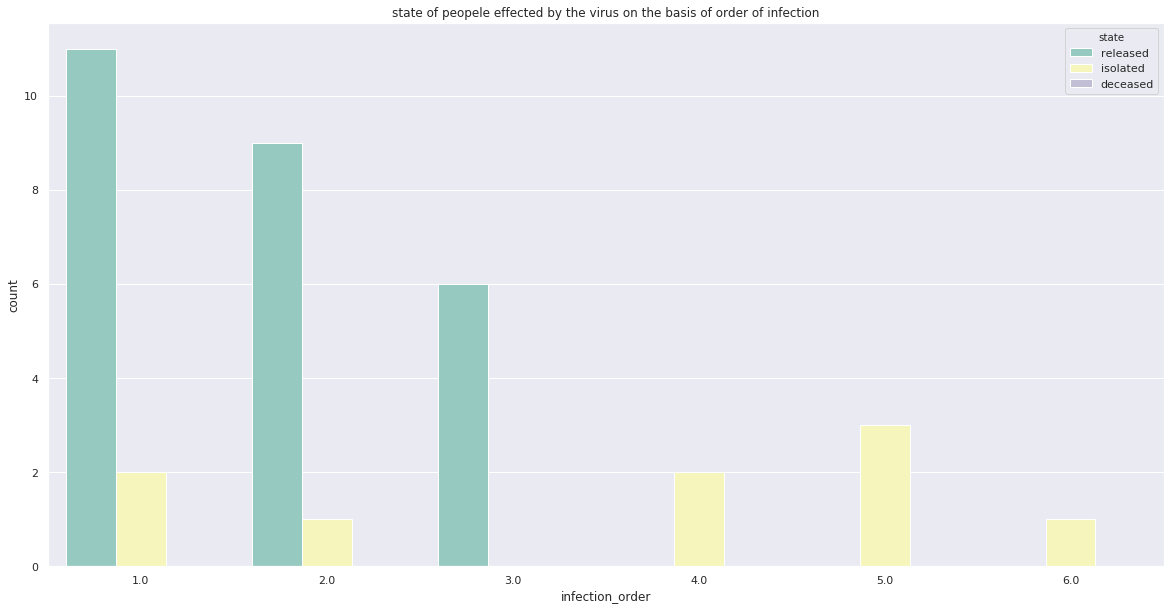

In [46]:
sns.set(rc={"figure.figsize":(20,10)})
sns.countplot(x=patient["infection_order"],palette="Set3",hue=patient["state"])
plt.title("state of peopele effected by the virus on the basis of order of infection",)
plt.show()

* *Infection order 1,2,3 are more dangerous as compared to 4,5,6*

* *understanding route data and preprocessing*

In [47]:
route.head()
print(route.info)
print(route.shape)
print(route.dtypes)

<bound method DataFrame.info of     id        date     province         city              visit   latitude  \
0    1  2020-01-19      Incheon      Jung-gu            airport  37.460459   
1    1  2020-01-20      Incheon       Seo-gu  hospital_isolated  37.478832   
2    2  2020-01-22  Gyeonggi-do     Gimpo-si            airport  37.562143   
3    2  2020-01-23        Seoul      Jung-gu  hospital_isolated  37.567454   
4    3  2020-01-20      Incheon      Jung-gu            airport  37.460459   
..  ..         ...          ...          ...                ...        ...   
63  14  2020-01-30  Gyeonggi-do   Bucheon-si             market  37.484044   
64  14  2020-02-02  Gyeonggi-do  Seongnam-si  hospital_isolated  37.347722   
65  15  2020-01-20      Incheon      Jung-gu            airport  37.460459   
66  15  2020-02-01  Gyeonggi-do     Suwon-si           hospital  37.304558   
67  15  2020-02-02  Gyeonggi-do  Seongnam-si  hospital_isolated  37.390524   

     longitude  
0   126.440680

* *checking for null values*

In [49]:

route.isnull().sum()

id           0
date         0
province     0
city         0
visit        0
latitude     0
longitude    0
dtype: int64

* *Number of people affected by virus on different cities of different provinces*

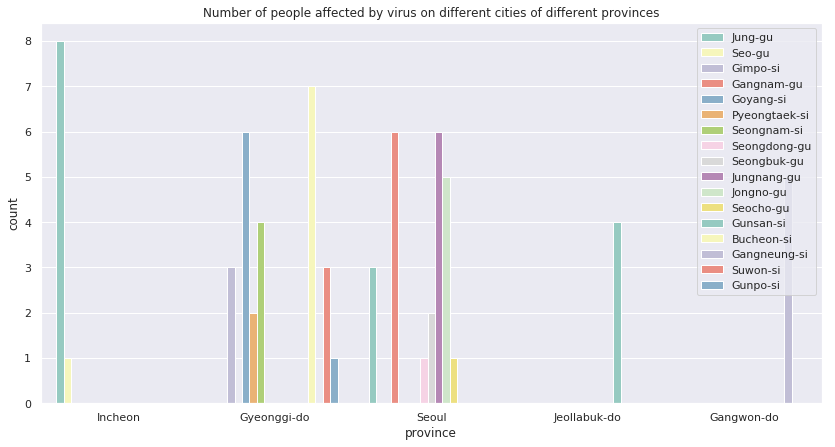

In [53]:
sns.set(rc={"figure.figsize":(14,7)})
sns.countplot(x=route["province"],palette="Set3",hue=route["city"])
plt.legend(loc="upper right")
plt.title("Number of people affected by virus on different cities of different provinces")
plt.show()

* *Places where risk of infection is high*

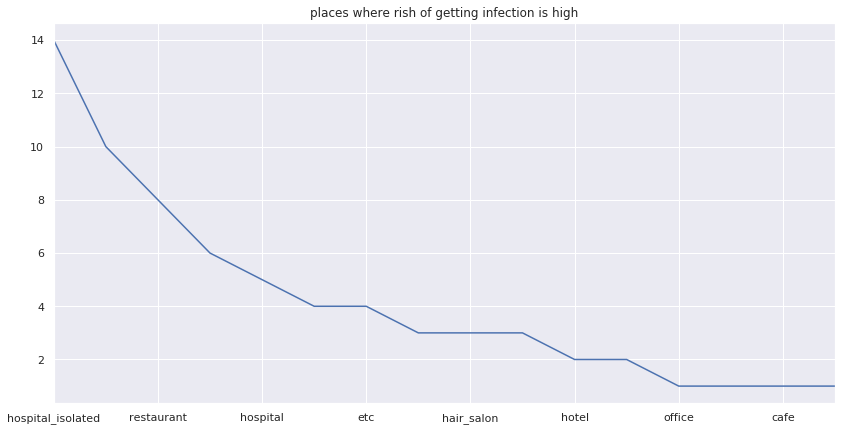

In [56]:
route.visit.value_counts().plot.line()
plt.title("places where risk of getting infection is high")
plt.show()

* *Understanding time data*

In [57]:
print(time.info())
print(time.dtypes)
print(time.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 11 columns):
date             44 non-null object
acc_test         44 non-null int64
acc_negative     44 non-null int64
acc_confirmed    44 non-null int64
acc_released     44 non-null int64
acc_deceased     44 non-null int64
new_test         44 non-null int64
new_negative     44 non-null int64
new_confirmed    44 non-null int64
new_released     44 non-null int64
new_deceased     44 non-null int64
dtypes: int64(10), object(1)
memory usage: 3.9+ KB
None
date             object
acc_test          int64
acc_negative      int64
acc_confirmed     int64
acc_released      int64
acc_deceased      int64
new_test          int64
new_negative      int64
new_confirmed     int64
new_released      int64
new_deceased      int64
dtype: object
(44, 11)


In [58]:
#checking for null values
time.isnull().sum()
#we dont have null values

date             0
acc_test         0
acc_negative     0
acc_confirmed    0
acc_released     0
acc_deceased     0
new_test         0
new_negative     0
new_confirmed    0
new_released     0
new_deceased     0
dtype: int64

In [60]:
time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,2020-01-20,1,0,1,0,0,1,0,1,0,0
1,2020-01-21,1,0,1,0,0,0,0,0,0,0
2,2020-01-22,4,3,1,0,0,3,3,0,0,0
3,2020-01-23,22,21,1,0,0,18,18,0,0,0
4,2020-01-24,27,25,2,0,0,5,4,1,0,0


In [61]:
print("number of acc tests run on people from  2020/01/20 to 2020/03/03 :",time.acc_test.sum())
print("number of people found negative from  2020/01/20 to 2020/03/03 :",time.acc_negative.sum())
print("number of people found positive from  2020/01/20 to 2020/03/03 :",time.acc_confirmed.sum())
print("number of people found positive and recovered  from  2020/01/20 to 2020/03/03 :",time.acc_released.sum())
print("number of people dead after found positive in acc_test from  2020/01/20 to 2020/03/03 :",time.acc_deceased.sum())

number of acc tests run on people from  2020/01/20 to 2020/03/03 : 900971
number of people found negative from  2020/01/20 to 2020/03/03 : 610435
number of people found positive from  2020/01/20 to 2020/03/03 : 26541
number of people found positive and recovered  from  2020/01/20 to 2020/03/03 : 424
number of people dead after found positive in acc_test from  2020/01/20 to 2020/03/03 : 171


In [62]:
print("number of new tests run on people from  2020/01/20 to 2020/03/03 :",time.new_test.sum())
print("number of people found negative from  2020/01/20 to 2020/03/03 :",time.new_negative.sum())
print("number of people found positive from  2020/01/20 to 2020/03/03 :",time.new_confirmed.sum())
print("number of people found positive and recovered  from  2020/01/20 to 2020/03/03 :",time.new_released.sum())
print("number of people dead after found positive in new test from  2020/01/20 to 2020/03/03 :",time.new_deceased.sum())

number of new tests run on people from  2020/01/20 to 2020/03/03 : 136707
number of people found negative from  2020/01/20 to 2020/03/03 : 102965
number of people found positive from  2020/01/20 to 2020/03/03 : 5328
number of people found positive and recovered  from  2020/01/20 to 2020/03/03 : 41
number of people dead after found positive in new test from  2020/01/20 to 2020/03/03 : 32
